In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# load the data
hate = pd.read_csv("Hate-2001-2020.csv")

# I. Data Description

In [30]:
hate.head()

,RecordId,ClosedYear,MonthOccurrence,County,NCIC,TotalNumberOfVictims,TotalNumberOfIndividualVictims,SuspectsRaceAsAGroup,TotalNumberOfSuspects,MostSeriousUcr,...,MostSeriousBiasType,MostSeriousVictimType,WeaponType,Offensive_Act,IsMultipleBias,TotalNumberOfIndividualVictimsAdult,TotalNumberOfIndividualVictimsJuvenile,TotalNumberOfSuspectsAdult,TotalNumberOfSuspectsJuvenile,SuspectsEthnicityAsAGroup
0,CA01-0000000001,2001,2,1,100,1,1,White,2,Simple Assault,...,Race/Ethnicity/Ancestry,Person,"Personal weapons (hands, feet, teeth, etc.)",Verbal slurs,NaN,NaN,NaN,NaN,NaN,NaN
1,CA01-0000000005,2001,2,1,100,2,2,White,1,Destruction/Damage/Vandalism,...,Race/Ethnicity/Ancestry,Person,NaN,Graffiti,NaN,NaN,NaN,NaN,NaN,NaN
2,CA01-0000000003,2001,5,1,100,1,1,White,4,Destruction/Damage/Vandalism,...,Race/Ethnicity/Ancestry,Person,NaN,Daubing of swastika,NaN,NaN,NaN,NaN,NaN,NaN
3,CA01-0000000002,2001,9,1,100,1,1,White,1,Intimidation,...,Race/Ethnicity/Ancestry,Person,NaN,Verbal slurs,NaN,NaN,NaN,NaN,NaN,NaN
4,CA01-0000000004,2001,9,1,100,2,2,White,1,Intimidation,...,Race/Ethnicity/Ancestry,Person,NaN,Verbal slurs,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# Variables info
#info = {'Variables': hate.columns, "Description" : ["Incident ID.","","","","","","","", "","","",""]}
#df_info = pd.DataFrame(data = info)
#df_info

In [32]:
hate.dtypes

RecordId                                   object
ClosedYear                                  int64
MonthOccurrence                             int64
County                                      int64
NCIC                                       object
TotalNumberOfVictims                        int64
TotalNumberOfIndividualVictims              int64
SuspectsRaceAsAGroup                       object
TotalNumberOfSuspects                       int64
MostSeriousUcr                             object
MostSeriousUcrType                         object
MostSeriousLocation                        object
MostSeriousBias                            object
MostSeriousBiasType                        object
MostSeriousVictimType                      object
WeaponType                                 object
Offensive_Act                              object
IsMultipleBias                             object
TotalNumberOfIndividualVictimsAdult       float64
TotalNumberOfIndividualVictimsJuvenile    float64


In [33]:
hate.shape

(24436, 23)

* There are 24436 entries of data and 23 variables.

In [34]:
# Description of numeric data
hate.describe()

,ClosedYear,MonthOccurrence,County,TotalNumberOfVictims,TotalNumberOfIndividualVictims,TotalNumberOfSuspects,TotalNumberOfIndividualVictimsAdult,TotalNumberOfIndividualVictimsJuvenile,TotalNumberOfSuspectsAdult,TotalNumberOfSuspectsJuvenile
count,24436.000000,24436.000000,24436.000000,24436.000000,24436.000000,24436.000000,5963.000000,5963.000000,5963.000000,5963.000000
mean,2009.346579,6.427525,27.567401,1.209732,1.073907,1.057702,0.952876,0.081335,0.875231,0.083850
std,6.049120,3.297776,12.890920,0.775260,0.878512,1.521642,0.682085,0.613440,1.099173,0.550392
min,2001.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,4.000000,19.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,2008.000000,6.000000,25.500000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,2015.000000,9.000000,37.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,2020.000000,12.000000,58.000000,50.000000,50.000000,50.000000,9.000000,40.000000,30.000000,15.000000


In [35]:
# Description of categorical data
hate.select_dtypes(include = ["object"]).describe()
# or use hate.describe(include=['O'])

,RecordId,NCIC,SuspectsRaceAsAGroup,MostSeriousUcr,MostSeriousUcrType,MostSeriousLocation,MostSeriousBias,MostSeriousBiasType,MostSeriousVictimType,WeaponType,Offensive_Act,IsMultipleBias,SuspectsEthnicityAsAGroup
count,24436,24436,24436,24436,24436,24436,24436,24436,24436,12670,24074,24,4813
unique,24436,558,11,11,2,44,35,6,6,16,14,1,4
top,CA00-0000013621,1942,Unknown,Destruction/Damage/Vandalism,Violent Crimes,Highway/Road/Alley/Street,Anti-Black or African American,Race/Ethnicity/Ancestry,Person,"Personal weapons (hands, feet, teeth, etc.)",Verbal slurs,True,Unknown
freq,1,5018,10127,8039,15775,6635,7508,14696,21147,6314,11043,24,2566


In [36]:
hate.isnull().values.any()

True

In [37]:
hate.isnull().sum()

RecordId                                      0
ClosedYear                                    0
MonthOccurrence                               0
County                                        0
NCIC                                          0
TotalNumberOfVictims                          0
TotalNumberOfIndividualVictims                0
SuspectsRaceAsAGroup                          0
TotalNumberOfSuspects                         0
MostSeriousUcr                                0
MostSeriousUcrType                            0
MostSeriousLocation                           0
MostSeriousBias                               0
MostSeriousBiasType                           0
MostSeriousVictimType                         0
WeaponType                                11766
Offensive_Act                               362
IsMultipleBias                            24412
TotalNumberOfIndividualVictimsAdult       18473
TotalNumberOfIndividualVictimsJuvenile    18473
TotalNumberOfSuspectsAdult              

In [38]:
hate.isnull().sum().sum()

130055

In [39]:
hate = hate.drop(columns=['WeaponType', 'Offensive_Act', 'IsMultipleBias', 
                               'TotalNumberOfIndividualVictimsAdult', 'TotalNumberOfIndividualVictimsJuvenile', 
                               'TotalNumberOfSuspectsAdult','TotalNumberOfSuspectsJuvenile',
                               'SuspectsEthnicityAsAGroup'])
hate.head()

,RecordId,ClosedYear,MonthOccurrence,County,NCIC,TotalNumberOfVictims,TotalNumberOfIndividualVictims,SuspectsRaceAsAGroup,TotalNumberOfSuspects,MostSeriousUcr,MostSeriousUcrType,MostSeriousLocation,MostSeriousBias,MostSeriousBiasType,MostSeriousVictimType
0,CA01-0000000001,2001,2,1,100,1,1,White,2,Simple Assault,Violent Crimes,Bar/Night Club,Anti-Black or African American,Race/Ethnicity/Ancestry,Person
1,CA01-0000000005,2001,2,1,100,2,2,White,1,Destruction/Damage/Vandalism,Property Crimes,Residence/Home/Driveway,Anti-Black or African American,Race/Ethnicity/Ancestry,Person
2,CA01-0000000003,2001,5,1,100,1,1,White,4,Destruction/Damage/Vandalism,Property Crimes,Residence/Home/Driveway,Anti-Hispanic or Latino,Race/Ethnicity/Ancestry,Person
3,CA01-0000000002,2001,9,1,100,1,1,White,1,Intimidation,Violent Crimes,Residence/Home/Driveway,Anti-Hispanic or Latino,Race/Ethnicity/Ancestry,Person
4,CA01-0000000004,2001,9,1,100,2,2,White,1,Intimidation,Violent Crimes,Convenience Store,Anti-Other Race/Ethnicity/Ancestry,Race/Ethnicity/Ancestry,Person


# II. Analysis of relationships between the variables

In [40]:
corr = hate.corr() # shows only numerical variables
corr = corr.replace(1.0, np.nan)
corr

,ClosedYear,MonthOccurrence,County,TotalNumberOfVictims,TotalNumberOfIndividualVictims,TotalNumberOfSuspects
ClosedYear,NaN,0.011456,-0.043765,-0.017429,-0.037419,-0.043958
MonthOccurrence,0.011456,NaN,-0.007333,0.000639,0.008389,-0.005667
County,-0.043765,-0.007333,NaN,0.020074,0.011222,-0.020401
TotalNumberOfVictims,-0.017429,0.000639,0.020074,NaN,0.919731,0.115568
TotalNumberOfIndividualVictims,-0.037419,0.008389,0.011222,0.919731,NaN,0.184507
TotalNumberOfSuspects,-0.043958,-0.005667,-0.020401,0.115568,0.184507,NaN


* Positive Correlation: both variables change in the same direction.
* Neutral Correlation: No relationship in the change of the variables.
* Negative Correlation: variables change in opposite directions.

In [41]:
corr.min() # negative correlations

ClosedYear                       -0.043958
MonthOccurrence                  -0.007333
County                           -0.043765
TotalNumberOfVictims             -0.017429
TotalNumberOfIndividualVictims   -0.037419
TotalNumberOfSuspects            -0.043958
dtype: float64

In [42]:
corr.min().idxmin(), corr[corr.min().idxmin()].idxmin() # the most negative correlation

('ClosedYear', 'TotalNumberOfSuspects')

In [43]:
corr.min().min()

-0.04395754022514175

In [44]:
corr.max() # positive correlations

ClosedYear                        0.011456
MonthOccurrence                   0.011456
County                            0.020074
TotalNumberOfVictims              0.919731
TotalNumberOfIndividualVictims    0.919731
TotalNumberOfSuspects             0.184507
dtype: float64

In [45]:
corr.max().idxmax(), corr[corr.max().idxmax()].idxmax() # the most positive correlation

('TotalNumberOfVictims', 'TotalNumberOfIndividualVictims')

In [46]:
corr.max().max()

0.919730574944717

<AxesSubplot:>

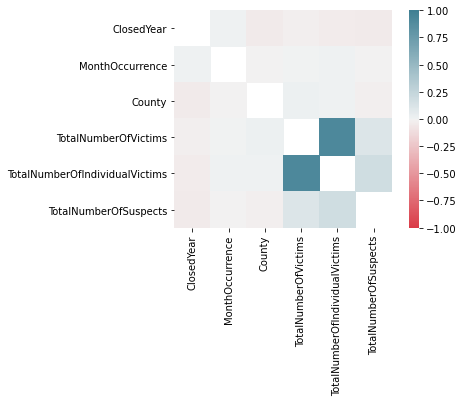

In [47]:
%matplotlib inline
import seaborn as sns

cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(corr, vmin=-1.0, vmax=1.0, square=True, cmap=cmap)

# III. Visualizations